In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [64]:
# listes
t, M, u, theta, R, X, Y = [], [], [], [], [], [], []
vx, vy, v = [], [], []
ax, ay = [], []

In [65]:
# Données astronomiques
# Terre
a = 1 # U.A
T_rev = 1 # ans
e = 0.017 # Excentricité S.U
N = 400 # positions tracées

In [66]:
# Equations de kepler

# Trajectoire
for i in range(0,N+6):
    t.append(i * T_rev / N)
    M.append(2 * np.pi / T_rev * t[i])
    u.append(float(op.fsolve(lambda x : x - e * np.sin(x) - M[i], 0)))

    # coordonées
    theta.append( 2 * np.arctan((np.sqrt((1+e)/(1-e)) * np.tan(u[i] / 2))))
    R.append(a * (1 - e ** 2) / (1 + e * np.cos(theta[i])))
    ## Cartésiene
    X.append(R[i] * np.cos(theta[i]))
    Y.append(R[i] * np.sin(theta[i]))

# Vecteurs V et A
for i in range(0, N+5):
    # vecteur vitesse
    # méthode de dérivée numérique 
    # (Théorème des accroissements finis)
    # exemple: vx(t4) = x5-x3/t5-t3
    vx.append((X[i+1]-X[i-1])/(t[i+1]-t[i-1]))
    vy.append((Y[i+1]-Y[i-1])/(t[i+1]-t[i-1]))
    # norme de la vitesse
    v.append(np.sqrt(vx[i]**2 + vy[i] **2 ) * 4.76) 

# Accelération
for i in range(0, N+4):
    ax.append((vx[i+1]-vx[i-1])/(t[i+1]-t[i-1]))
    ay.append((vy[i+1]-vy[i-1])/(t[i+1]-t[i-1]))


Au point 40 vitesse 30.317772499887596 km/s


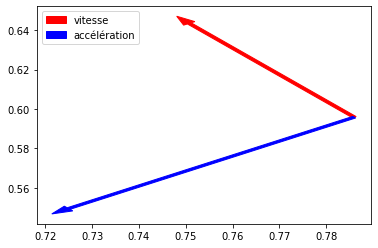

In [68]:
point = 40
print("Au point", point, "vitesse", v[point], "km/s")

echelleV = 0.01 # echelles pour la longueur des vecteurs V & A
echelleA = 0.002

plt.arrow(X[point], Y[point], vx[point] * echelleV , vy[point] * echelleV, color="r",length_includes_head=True, label="vitesse")
plt.arrow(X[point], Y[point], ax[point] * echelleA , ay[point] * echelleA, color="b",length_includes_head=True, label="accélération")
plt.legend()
plt.show()

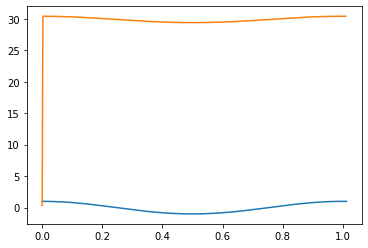

In [48]:
t1 = list()
for i in range(len(t) - 1):
    t1.append(t[i])

plt.plot(t,X)
plt.plot(t1,v)